# Classification Algorithms on Heart Disease Dataset

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-Algorithms-on-Heart-Disease-Dataset" data-toc-modified-id="Classification-Algorithms-on-Heart-Disease-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification Algorithms on Heart Disease Dataset</a></span><ul class="toc-item"><li><span><a href="#About-the-Dataset" data-toc-modified-id="About-the-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>About the Dataset</a></span></li><li><span><a href="#Import-Necessary-Libraries" data-toc-modified-id="Import-Necessary-Libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Necessary Libraries</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Standardize-features" data-toc-modified-id="Standardize-features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Standardize features</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>GridSearch</a></span></li></ul></li></ul></div>

## About the Dataset

Dataset Link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
heart_data.shape

(1025, 14)

In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


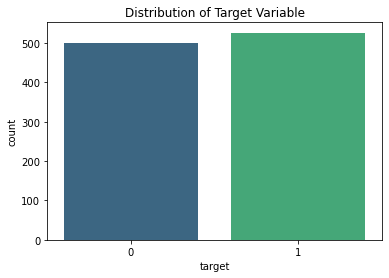

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data, palette='viridis')
plt.title('Distribution of Target Variable')
plt.show()

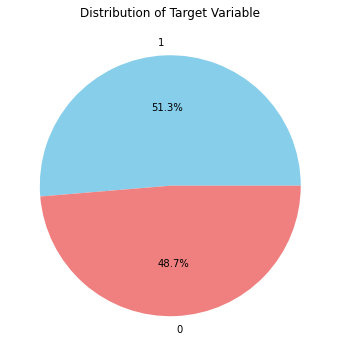

In [8]:
# Count the occurrences of each target value
target_counts = heart_data['target'].value_counts()
# Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable')
plt.show()

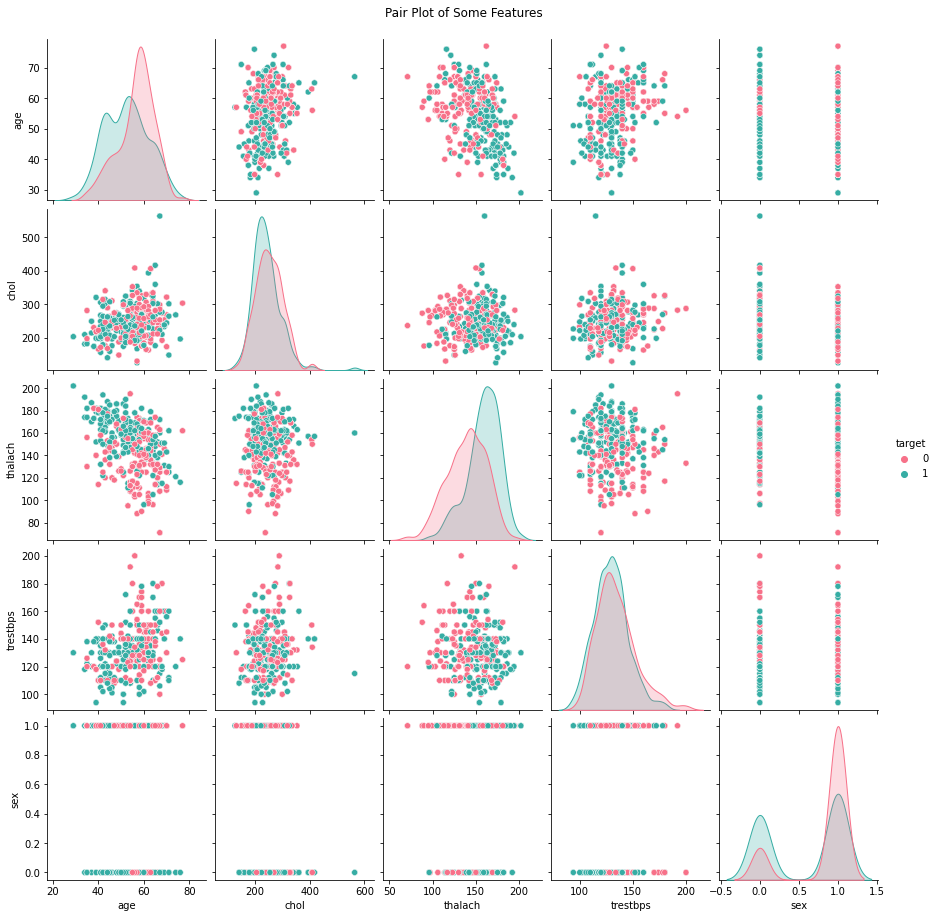

In [9]:
sns.pairplot(heart_data[['age', 'chol', 'thalach', 'trestbps', 'sex', 'target']], hue='target', palette='husl')
plt.suptitle('Pair Plot of Some Features', y=1.02)
plt.show()

## Feature Selection

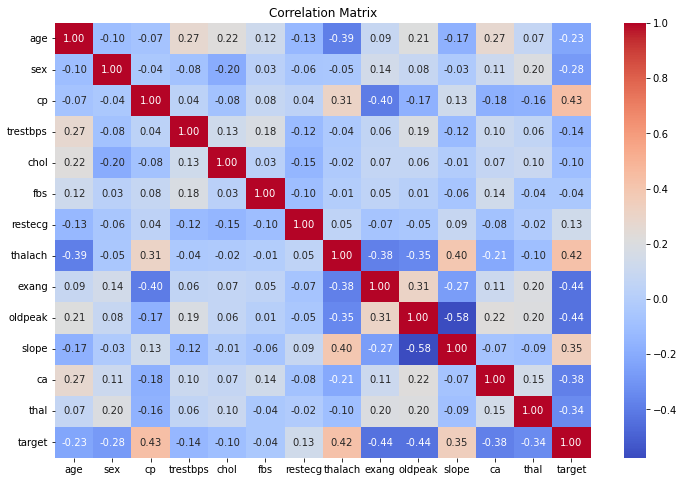

In [10]:
correlation_matrix = heart_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Separate features and target variable
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Calculate the correlation between each feature and the target variable
feature_target_correlation = X.apply(lambda feature: feature.corr(y))

# Set a correlation threshold 
correlation_threshold = 0.2

# Print the correlation values for debugging
print("Feature-Target Correlations:")
print(feature_target_correlation)

# Select features that are highly correlated with the target variable
selected_features = feature_target_correlation[abs(feature_target_correlation) > correlation_threshold].index

# Print the selected features
print("Selected Features:")
print(selected_features)

Feature-Target Correlations:
age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
dtype: float64
Selected Features:
Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')


In [12]:
X_selected = X[selected_features]
X_selected

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,168,0,1.0,2,2,3
1,53,1,0,155,1,3.1,0,0,3
2,70,1,0,125,1,2.6,0,0,3
3,61,1,0,161,0,0.0,2,1,3
4,62,0,0,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...
1020,59,1,1,164,1,0.0,2,0,2
1021,60,1,0,141,1,2.8,1,1,3
1022,47,1,0,118,1,1.0,1,1,2
1023,50,0,0,159,0,0.0,2,0,2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Standardize features 

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [15]:
logistic_regression = LogisticRegression(random_state=42)

logistic_regression.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_regression.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

classification_report_logistic = classification_report(y_test, y_pred_logistic)

In [16]:
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Classification Report:\n", classification_report_logistic)


Logistic Regression Results:
Accuracy: 0.8000
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



## Decision Tree

In [17]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_report_tree = classification_report(y_test, y_pred_tree)

In [18]:
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f}")
print("Classification Report:\n", classification_report_tree)


Decision Tree Results:
Accuracy: 0.9854
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Random Forest

In [31]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
classification_report_forest = classification_report(y_test, y_pred_forest)

In [32]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_forest:.4f}")
print("Classification Report:\n", classification_report_forest)


Random Forest Results:
Accuracy: 0.9854
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## SVM

In [21]:
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

In [22]:
print("\nSVM Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:\n", classification_report_svm)


SVM Results:
Accuracy: 0.8927
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.89       102
           1       0.85      0.95      0.90       103

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205



## KNN

In [41]:
knn = KNeighborsClassifier( n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

In [43]:
print("\nKNN Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:\n", classification_report_knn)


KNN Results:
Accuracy: 0.8634
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       102
           1       0.86      0.87      0.87       103

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



## GridSearch

In [25]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search using cross-validation (5-fold cross-validation in this example)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Best Parameters:", best_params)
print("Test Accuracy with Best Model:", accuracy)

Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Test Accuracy with Best Model: 1.0
